## "Analyse and predict factors related to readmission as well as other outcomes pertaining to patients with diabetes."

### The Dataset 

You will be working with the [readmission data](https://archive.ics.uci.edu/ml/datasets/Diabetes+130-US+hospitals+for+years+1999-2008). Management of hyperglycemia in hospitalized patients has a significant bearing on outcome, in terms of both morbidity and mortality. In this dataset you will need to see what the impact of various clinical practices is readmission rates.

The dataset represents 10 years (1999-2008) of clinical care at 130 US hospitals and integrated delivery networks. It includes over 50 features representing patient and hospital outcomes. Information was extracted from the database for encounters that satisfied the following criteria:

- It is an inpatient encounter (a hospital admission).
- It is a diabetic encounter, that is, one during which any kind of diabetes was entered to the system as a diagnosis.
- The length of stay was at least 1 day and at most 14 days.
- Laboratory tests were performed during the encounter.
- Medications were administered during the encounter.

The data contains attributes such as patient number, race, gender, age, admission type, time in hospital, medical specialty of admitting physician, number of lab test performed, HbA1c test result, diagnosis, number of medication, diabetic medications, number of outpatient, inpatient, emergency visits in the year before the hospitalization and many others.

### The Goal 

To pre-process, analyse, visualise, and conduct unsupervised and supervised learning on this input dataset. The final outcome is a classifier that is able to predict a patient's readmission.

## 1. Load the libraries


In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.grid_search import GridSearchCV

from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve

import matplotlib.pylab as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

C:\Users\Pedro\Anaconda2\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\Pedro\Anaconda2\lib\site-packages\sklearn\grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


*** Importing data and replace missing values represented by ***"?"***: ***

In [2]:
diabetes = pd.read_csv('diabetic_data.csv', index_col = ['encounter_id', 'patient_nbr'], na_values = ['?'], low_memory = False)

***Initial Checkout:***

- ***Print the contents of the input data ***
- ***Check the data dimensionality ***
- ***Check and detect any format issues, missing values or anomalies ***
- ***Find the number of unique elements per column and the type of data that these columns contain (categorical, numeric, etc.)***
- ***Generate summary statistics per column ***

In [3]:
# Checking first lines
print(diabetes.head())  

                                     race  gender      age weight  \
encounter_id patient_nbr                                            
2278392      8222157            Caucasian  Female   [0-10)    NaN   
149190       55629189           Caucasian  Female  [10-20)    NaN   
64410        86047875     AfricanAmerican  Female  [20-30)    NaN   
500364       82442376           Caucasian    Male  [30-40)    NaN   
16680        42519267           Caucasian    Male  [40-50)    NaN   

                          admission_type_id  discharge_disposition_id  \
encounter_id patient_nbr                                                
2278392      8222157                      6                        25   
149190       55629189                     1                         1   
64410        86047875                     1                         1   
500364       82442376                     1                         1   
16680        42519267                     1                         1   

    

In [4]:
# Checking Data Dimensionality
print(diabetes.shape)  

(101766, 48)


In [5]:
# Checking Missing Values
pd.isnull(diabetes).sum() 

race                         2273
gender                          0
age                             0
weight                      98569
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                  40256
medical_specialty           49949
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                         21
diag_2                        358
diag_3                       1423
number_diagnoses                0
max_glu_serum                   0
A1Cresult                       0
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide                   0
glipizide                       0
glyburide     

*Weight has a huge number of missing values so this feature will be dropped*

In [6]:
# Dropping the weight column
diabetes = diabetes.drop('weight', 1) 
diabetes.head(10)

,,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
encounter_id,patient_nbr,,,,,,,,,,,,,,,,,,,,,
2278392,8222157,Caucasian,Female,[0-10),6,25,1,1,NaN,Pediatrics-Endocrinology,41,...,No,No,No,No,No,No,No,No,No,NO
149190,55629189,Caucasian,Female,[10-20),1,1,7,3,NaN,NaN,59,...,No,Up,No,No,No,No,No,Ch,Yes,>30
64410,86047875,AfricanAmerican,Female,[20-30),1,1,7,2,NaN,NaN,11,...,No,No,No,No,No,No,No,No,Yes,NO
500364,82442376,Caucasian,Male,[30-40),1,1,7,2,NaN,NaN,44,...,No,Up,No,No,No,No,No,Ch,Yes,NO
16680,42519267,Caucasian,Male,[40-50),1,1,7,1,NaN,NaN,51,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
35754,82637451,Caucasian,Male,[50-60),2,1,2,3,NaN,NaN,31,...,No,Steady,No,No,No,No,No,No,Yes,>30
55842,84259809,Caucasian,Male,[60-70),3,1,2,4,NaN,NaN,70,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
63768,114882984,Caucasian,Male,[70-80),1,1,7,5,NaN,NaN,73,...,No,No,No,No,No,No,No,No,Yes,>30
12522,48330783,Caucasian,Female,[80-90),2,1,4,13,NaN,NaN,68,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [7]:
# Replacing missing values by fillna function
diabetes.fillna(0)

,,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
encounter_id,patient_nbr,,,,,,,,,,,,,,,,,,,,,
2278392,8222157,Caucasian,Female,[0-10),6,25,1,1,0,Pediatrics-Endocrinology,41,...,No,No,No,No,No,No,No,No,No,NO
149190,55629189,Caucasian,Female,[10-20),1,1,7,3,0,0,59,...,No,Up,No,No,No,No,No,Ch,Yes,>30
64410,86047875,AfricanAmerican,Female,[20-30),1,1,7,2,0,0,11,...,No,No,No,No,No,No,No,No,Yes,NO
500364,82442376,Caucasian,Male,[30-40),1,1,7,2,0,0,44,...,No,Up,No,No,No,No,No,Ch,Yes,NO
16680,42519267,Caucasian,Male,[40-50),1,1,7,1,0,0,51,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
35754,82637451,Caucasian,Male,[50-60),2,1,2,3,0,0,31,...,No,Steady,No,No,No,No,No,No,Yes,>30
55842,84259809,Caucasian,Male,[60-70),3,1,2,4,0,0,70,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
63768,114882984,Caucasian,Male,[70-80),1,1,7,5,0,0,73,...,No,No,No,No,No,No,No,No,Yes,>30
12522,48330783,Caucasian,Female,[80-90),2,1,4,13,0,0,68,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [8]:
# Checking the number of unique values
diabetes.apply(pd.Series.nunique)

race                          5
gender                        3
age                          10
admission_type_id             8
discharge_disposition_id     26
admission_source_id          17
time_in_hospital             14
payer_code                   17
medical_specialty            72
num_lab_procedures          118
num_procedures                7
num_medications              75
number_outpatient            39
number_emergency             33
number_inpatient             21
diag_1                      716
diag_2                      748
diag_3                      789
number_diagnoses             16
max_glu_serum                 4
A1Cresult                     4
metformin                     4
repaglinide                   4
nateglinide                   4
chlorpropamide                4
glimepiride                   4
acetohexamide                 2
glipizide                     4
glyburide                     4
tolbutamide                   2
pioglitazone                  4
rosiglit

In [9]:
# Checking the Statistical Summary and using transpose to flip it into a more readable format
diabetes.describe().transpose() 

,count,mean,std,min,25%,50%,75%,max
admission_type_id,101766.0,2.024006,1.445403,1.0,1.0,1.0,3.0,8.0
discharge_disposition_id,101766.0,3.715642,5.280166,1.0,1.0,1.0,4.0,28.0
admission_source_id,101766.0,5.754437,4.064081,1.0,1.0,7.0,7.0,25.0
time_in_hospital,101766.0,4.395987,2.985108,1.0,2.0,4.0,6.0,14.0
num_lab_procedures,101766.0,43.095641,19.674362,1.0,31.0,44.0,57.0,132.0
num_procedures,101766.0,1.339730,1.705807,0.0,0.0,1.0,2.0,6.0
num_medications,101766.0,16.021844,8.127566,1.0,10.0,15.0,20.0,81.0
number_outpatient,101766.0,0.369357,1.267265,0.0,0.0,0.0,0.0,42.0
number_emergency,101766.0,0.197836,0.930472,0.0,0.0,0.0,0.0,76.0
number_inpatient,101766.0,0.635566,1.262863,0.0,0.0,0.0,1.0,21.0


## 2. Mining, Pre-processing and Exploring Data

Data mining and exploratory data analysis (EDA) is a crucial step in the ML model building process and is essential for verifying and improving the quality of the input data. The following could be applied: 

- pre-processing: scale, normalise or transform the data.

- handle categorical variables (e.g. one-hot encoding, label encoding), missing values (e.g. by removing rows or columns, imputation with zeros or centrality metrics) and outliers. 

- dimensionality reduction or feature extraction.

- EDA and visualisation: data exploration and visualization.

As you can see from the previous steps, the scale of different columns are very different, for instance the number of lab procedures is very large, numbering in the 10s to 100s while other columns number in the single digits. Scaling and normalizing to mean zero, variance one will ensure no column dominates the others in importance due to scale alone.

In [21]:
# Creating two diabetes sets X and y (features and target)
X = diabetes.iloc[:,:(diabetes.shape[1] - 1)]
y = diabetes.iloc[:,-1]

In [22]:
# Split into numeric and categorical
X_numeric = X.loc[:, (X.dtypes == "int64") | (X.dtypes == "float64")]

X_categorical_numeric = X_numeric[['admission_type_id', 'discharge_disposition_id', 'admission_source_id']]
X_numeric = X_numeric.drop(['admission_type_id', 'discharge_disposition_id', 'admission_source_id'], 1)

print(X_numeric.head())

                          time_in_hospital  num_lab_procedures  \
encounter_id patient_nbr                                         
2278392      8222157                     1                  41   
149190       55629189                    3                  59   
64410        86047875                    2                  11   
500364       82442376                    2                  44   
16680        42519267                    1                  51   

                          num_procedures  num_medications  number_outpatient  \
encounter_id patient_nbr                                                       
2278392      8222157                   0                1                  0   
149190       55629189                  0               18                  0   
64410        86047875                  5               13                  2   
500364       82442376                  1               16                  0   
16680        42519267                  0                8

In [23]:
# One-hot encode the categorical variables
Xcategorical = X.loc[:, (X.dtypes == "object")]
Xcategorical = pd.get_dummies(Xcategorical)
print 'Rows and Columns:', Xcategorical.shape
print '\n', Xcategorical.head()

Rows and Columns: (101766, 2443)

                          race_AfricanAmerican  race_Asian  race_Caucasian  \
encounter_id patient_nbr                                                     
2278392      8222157                         0           0               1   
149190       55629189                        0           0               1   
64410        86047875                        1           0               0   
500364       82442376                        0           0               1   
16680        42519267                        0           0               1   

                          race_Hispanic  race_Other  gender_Female  \
encounter_id patient_nbr                                             
2278392      8222157                  0           0              1   
149190       55629189                 0           0              1   
64410        86047875                 0           0              1   
500364       82442376                 0           0              0   

In [24]:
# Using sklearn StandardScaler() to transformthe numeric features to mean 0, variance 1.
scaler = StandardScaler()
X_numeric_scaled = scaler.fit_transform(X_numeric)
X_numeric_scaled  = pd.DataFrame(X_numeric_scaled, columns = X_numeric.columns, index = X_numeric.index)
X_numeric_scaled.head()

,,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
encounter_id,patient_nbr,,,,,,,,
2278392,8222157,-1.137649,-0.106517,-0.785398,-1.848268,-0.291461,-0.21262,-0.503276,-3.321596
149190,55629189,-0.467653,0.808384,-0.785398,0.243390,-0.291461,-0.21262,-0.503276,0.815784
64410,86047875,-0.802651,-1.631351,2.145781,-0.371804,1.286748,-0.21262,0.288579,-0.735733
500364,82442376,-0.802651,0.045967,-0.199162,-0.002688,-0.291461,-0.21262,-0.503276,-0.218561
16680,42519267,-1.137649,0.401761,-0.785398,-0.986997,-0.291461,-0.21262,-0.503276,-1.252906


In [25]:
# Curiosity about the scaled data statistial summary
X_numeric_scaled.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
time_in_hospital,101766.0,2.357310e-14,1.000005,-1.137649,-0.802651,-0.132655,0.537341,3.217324
num_lab_procedures,101766.0,3.243938e-16,1.000005,-2.139630,-0.614795,0.045967,0.706728,4.518815
num_procedures,101766.0,4.233273e-15,1.000005,-0.785398,-0.785398,-0.199162,0.387074,2.732016
num_medications,101766.0,-2.183720e-14,1.000005,-1.848268,-0.740920,-0.125726,0.489467,7.994826
number_outpatient,101766.0,1.000822e-13,1.000005,-0.291461,-0.291461,-0.291461,-0.291461,32.850938
number_emergency,101766.0,2.509265e-14,1.000005,-0.212620,-0.212620,-0.212620,-0.212620,81.466733
number_inpatient,101766.0,-4.314501e-14,1.000005,-0.503276,-0.503276,-0.503276,0.288579,16.125684
number_diagnoses,101766.0,1.284175e-13,1.000005,-3.321596,-0.735733,0.298612,0.815784,4.435992


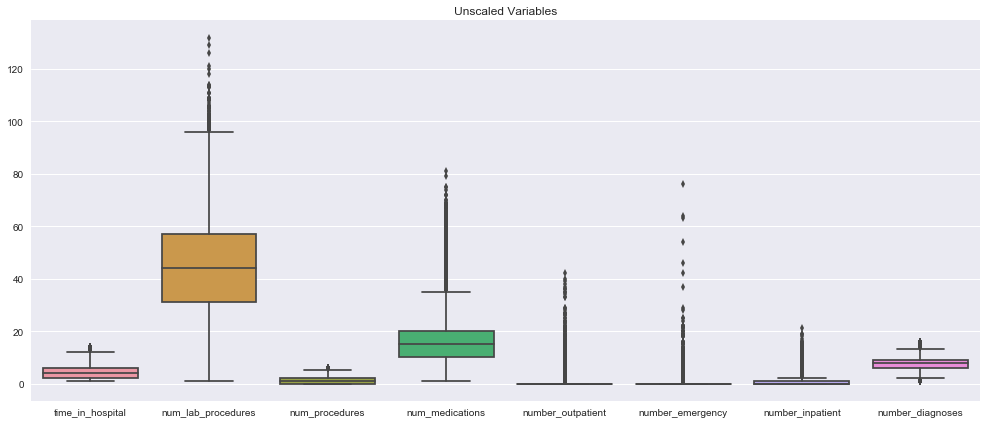

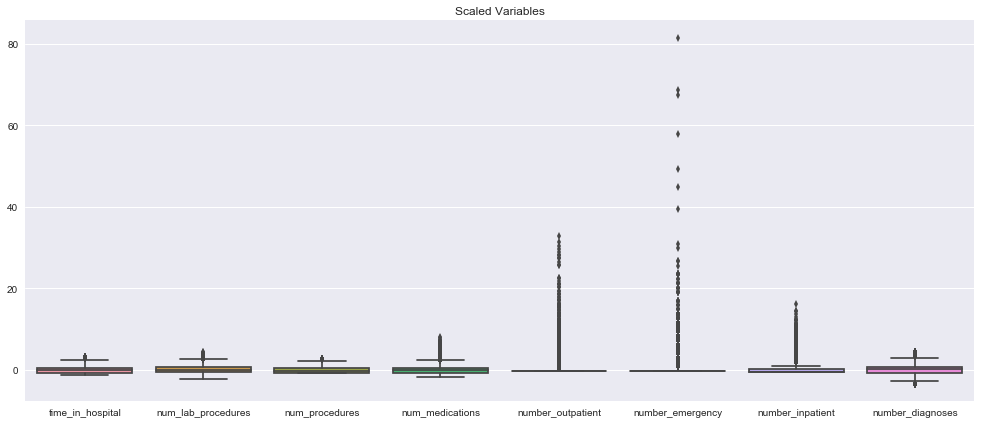

In [26]:
# Showing the difference between scaled and unscaled variables
plt.figure(figsize=(17, 7))
g = sns.boxplot(data=X_numeric)
plt.title('Unscaled Variables')

plt.figure(figsize=(17, 7))
g = sns.boxplot(data=X_numeric_scaled)
plt.title('Scaled Variables')

*There are a number of outliers, particularly in the number of outpatient and emergency trips. Will leave them for now as they are likely to be interesting and helpful in the future*

In [27]:
# Combining Categorical and Numeric columns
X = X_numeric.join(Xcategorical)
print ('X Shape:'), X.shape
print ('y shape:'), y.shape
print(X.head())

X = X.iloc[0:10000,]
y = y.iloc[0:10000]

X Shape: (101766, 2451)
y shape: (101766L,)
                          time_in_hospital  num_lab_procedures  \
encounter_id patient_nbr                                         
2278392      8222157                     1                  41   
149190       55629189                    3                  59   
64410        86047875                    2                  11   
500364       82442376                    2                  44   
16680        42519267                    1                  51   

                          num_procedures  num_medications  number_outpatient  \
encounter_id patient_nbr                                                       
2278392      8222157                   0                1                  0   
149190       55629189                  0               18                  0   
64410        86047875                  5               13                  2   
500364       82442376                  1               16                  0   
16680        

## 3. Unsupervised Learning

Using unsupervised learning techniques as a way of detecting trends, patterns and clusters in the data (the interest here is to find potential similarities and dimissimilarities in-between different groups of patients).

- Centroid-based clustering
- Hierarchical clustering 
- Density-based clustering 

***Calculating PCA***

Will calculate principal components, check how much variance is explain, then use centroid-based clustering to see how many clusters (if any) we can pick out.

[<matplotlib.text.Text at 0x11eaa080>, <matplotlib.text.Text at 0x16e53f98>]

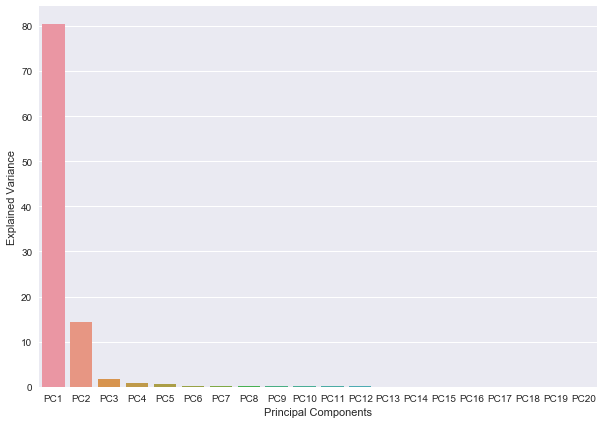

In [28]:
pca = PCA(n_components = 20)
scores = pca.fit_transform(X)

indx = ['PC'+str(i+1) for i in range(20)]
Xpca = pd.DataFrame(scores, columns = indx, index = X.index)
exp_var = [i*100 for i in pca.explained_variance_ratio_]

# Calculating the Cumulative Variance
cum_var = np.cumsum(pca.explained_variance_ratio_*100)

# Combining both in a single dataframe
pca_var = pd.DataFrame(data={'exp_var': exp_var, 'cum_var': cum_var}, index=indx)
pca_var.head(10)

# Plot the explained variance per principal component
fig = plt.figure(figsize=(10,7))
ax = sns.barplot(x=pca_var.index, y='exp_var', data=pca_var)
ax.set(xlabel='Principal Components', ylabel='Explained Variance')

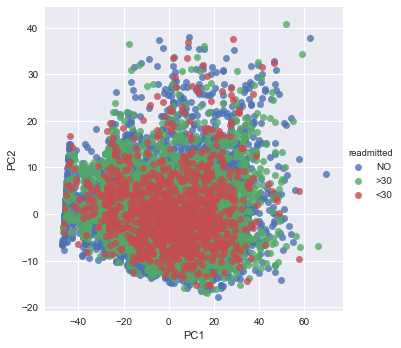

In [29]:
Xpca = pd.DataFrame(scores, columns = indx, index = X.index)

scores_with_response = Xpca.join(y)
scores_with_response = scores_with_response.reset_index()

sns.lmplot(x = "PC1", y = "PC2", hue="readmitted", data = scores_with_response, fit_reg=False)

Plotting the principal components it is clear that clustering on this transformation of the data is likely to be very uninformative.

***t-distributed Stochastic Neighbor Embedding***

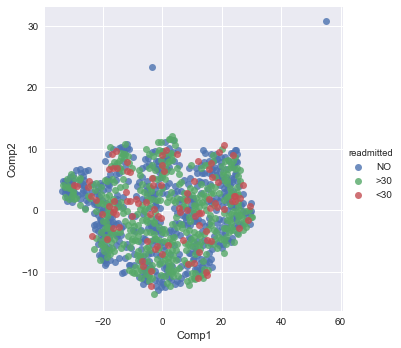

In [30]:
# WARNING: don't run this with the whole data set or your kernel will probably crash.
from time import time
from sklearn import manifold

# Creating smaller versions of X and y to run with tSNE
Xtmp = X.iloc[0:1000,] 
ytmp = y.iloc[0:1000]

# Picked a perplexity of 100, but can be changed, this affects the 'neighborhood' size around the points of the clustering
tsne = manifold.TSNE(n_components=2, init='pca', random_state=0, perplexity = 100)
t0 = time()
X_tsne = tsne.fit_transform(Xtmp)

X_tsne = pd.DataFrame(X_tsne, columns = ["Comp1", "Comp2"], index = Xtmp.index)
X_tsne = X_tsne.join(ytmp)
X_tsne = X_tsne.reset_index()
X_tsne.head()

sns.lmplot(x = "Comp1", y = "Comp2", hue="readmitted", data = X_tsne, fit_reg=False)

Nothing was found with tSNE either, but it is was a good try with this new technique that can be used in exploratory data analysis. See: http://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html and
http://distill.pub/2016/misread-tsne/

## 4. Supervised Learning - Train, test, optimise and evaluate

- Random Forests
- AdaBoost

***Random Forests:***

In [68]:
# Building a Random Forest Classifier
le = LabelEncoder()
y_enc = le.fit_transform(y)

rf = RandomForestClassifier(n_estimators=300, random_state=1)
cross_val_score(rf, X, y_enc).mean()

0.55330014105189762

**Using *GridSearchCV* to pick optimal hyperparameters.**

In this case, parameters such as `n_estimators`, `max_features`, `max_depth` and `min_samples_leaf` can be some of the parameters to be optimised. The optimal choice for these parameters is highly *data-dependent*. Rather than trying one-by-one predefined values for each hyperparameter, we can automate this process. The scikit-learn library provides the grid search function [`GridSearchCV`](http://scikit-learn.org/stable/modules/generated/sklearn.grid_search.GridSearchCV.html).

In [31]:
Xtrain,Xtest,ytrain,ytest = train_test_split(X, y, test_size = 0.3)

In [32]:
# Parameters Investigated:
n_estimators = np.arange(50, 250, 50)
max_depth    = np.arange(1, 50, 5)
parameters   = [{'n_estimators': n_estimators, 'max_depth': max_depth}]

# Additional parameters to investigate could include 
# max_features = [1, 3, 10]
# min_samples_split = [1, 3, 10]
# min_samples_leaf  = [1, 3, 10]
# bootstrap = [True, False]
# criterion = ["gini", "entropy"]

gridCV = GridSearchCV(RandomForestClassifier(), param_grid=parameters, cv=10, n_jobs=4)
gridCV.fit(Xtrain, ytrain)

# Print the optimal parameters
best_n_estim   = gridCV.best_params_['n_estimators']
best_max_depth = gridCV.best_params_['max_depth']
print ("Best parameters: n_estimators=", best_n_estim,", max_depth=", best_max_depth) 

('Best parameters: n_estimators=', 200, ', max_depth=', 36)


In [33]:
rf = RandomForestClassifier(n_estimators=best_n_estim, random_state=1, max_depth = best_max_depth)

rf.fit(Xtrain, ytrain)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=36, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=200, n_jobs=1, oob_score=False, random_state=1,
            verbose=0, warm_start=False)

In [34]:
# Obviously, accuracy is not the only important measure
print(metrics.classification_report(ytest, rf.predict(Xtest)))

             precision    recall  f1-score   support

        <30       0.00      0.00      0.00       352
        >30       0.54      0.33      0.41      1149
         NO       0.57      0.87      0.68      1499

avg / total       0.49      0.56      0.50      3000



***AdaBoost:***

*Using AdaBoost, this works by first fitting a random forest to the original data, then up-weighting classes that are poorly classified in the previous run and fitting a new model.*

In [35]:
from sklearn.ensemble import AdaBoostClassifier
clf = AdaBoostClassifier(n_estimators=300)

clf.fit(Xtrain, ytrain)
print(metrics.classification_report(ytest, clf.predict(Xtest)))

             precision    recall  f1-score   support

        <30       0.26      0.08      0.12       352
        >30       0.49      0.43      0.46      1149
         NO       0.59      0.74      0.65      1499

avg / total       0.51      0.54      0.52      3000



Our accuracy on the AdaBoost is better overall, plus we are now able to recover some of the '<30' class that we were completely missing before!